# Supplementary Materials

In [1]:
#import libraries
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

cartopy.config['data_dir'] = '/home/rwhite01/python/inputdata/'


In [63]:
#define plotting functions (I've changed the alpha on the borders to 0.5 for the contour plots)
central_lon = 240
central_lat = 39.0

lon_extent = [-135,-110]
lat_extent = [42,60]
latgrids=[40,45,50,55,60,65,70]
longrids=[-125,-115]

fontsize = 16
fontsize_labels = 14

def set_ax(ax,longrids,latgrids,province=False):
    resol = '50m'
    provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
                name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k', alpha = 0.5)

    ax.set_extent([lon_extent[0], lon_extent[1], lat_extent[0], lat_extent[1]])
    if province:
        ax.add_feature(provinc_bodr, linestyle='-', linewidth=1.5, edgecolor="k", zorder=10, alpha = 0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=1.5)
    #ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN, color = 'lightcyan')
    ax.set_aspect('auto')
    #gl = ax.gridlines(draw_labels = True, alpha=0.5)
    gl = ax.gridlines(draw_labels=True, x_inline=None, y_inline=False, alpha = 0.5, linestyle = "dashed")
    gl.ylocator = matplotlib.ticker.FixedLocator(latgrids)
    gl.xlocator = matplotlib.ticker.FixedLocator(longrids)
    gl.xlabel_style = {'rotation': 0}
    gl.top_labels = None
    gl.right_labels = None

    return(ax)

def set_ax_overview(ax,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=False):
    resol = '50m'
    provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
                name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='silver', alpha = 0.5)

    ax.set_extent([lon_extent[0], lon_extent[1], lat_extent[0], lat_extent[1]])
    if province:
        ax.add_feature(provinc_bodr, linestyle='-', linewidth=1.5, edgecolor="k", zorder=10, alpha = 0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=1.5)
    #ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.OCEAN, color = 'lightblue')
    ax.set_aspect('auto')
    #gl = ax.gridlines(draw_labels = True, alpha=0.5)
    gl = ax.gridlines(draw_labels=True, x_inline=None, y_inline=False)
    gl.ylocator = matplotlib.ticker.FixedLocator(latgrids)
    gl.xlocator = matplotlib.ticker.FixedLocator(longrids)
    gl.top_labels = None
    gl.right_labels = None

    gl.xlabel_style = {'color': 'gray','rotation': 0}
    gl.ylabel_style = {'color': 'gray'}

    return(ax)

def get_colormaps():
    # Define new colormap with white centre
    reds = np.array([10,15,30,60,80,130,160,200,230,255,255,255,255,255,255,255,255,255,192,165],float)
    greens = np.array([50,75,110,160,180,210,240,250,255,255,255,250,232,192,160,96,50,20,0,0],float)
    blues = np.array([120,165,200,240,250,255,255,255,255,255,255,220,120,60,0,0,0,0,0,0],float)

    reds = reds/255
    blues = blues/255
    greens = greens/255

    ncolors = len(reds)

    spacing = np.linspace(0,1,ncolors)
    cdict = {'red': ((spacing[0], reds[0], reds[0]),
                     (spacing[1], reds[1], reds[1]),
                     (spacing[2], reds[2], reds[2]),
                     (spacing[3], reds[3], reds[3]),
                     (spacing[4], reds[4], reds[4]),
                     (spacing[5], reds[5], reds[5]),
                     (spacing[6], reds[6], reds[6]),
                     (spacing[7], reds[7], reds[7]),
                     (spacing[8], reds[8], reds[8]),
                     (spacing[9], reds[9], reds[9]),
                     (spacing[10], reds[10], reds[10]),
                     (spacing[11], reds[11], reds[11]),
                     (spacing[12], reds[12], reds[12]),
                     (spacing[13], reds[13], reds[13]),
                     (spacing[14], reds[14], reds[14]),
                     (spacing[15], reds[15], reds[15]),
                     (spacing[16], reds[16], reds[16]),
                     (spacing[17], reds[17], reds[17]),
                     (spacing[18], reds[18], reds[18]),
                     (spacing[19], reds[19], reds[19])
                    ),
             'green': ((spacing[0], greens[0], greens[0]),
                     (spacing[1], greens[1], greens[1]),
                     (spacing[2], greens[2], greens[2]),
                     (spacing[3], greens[3], greens[3]),
                     (spacing[4], greens[4], greens[4]),
                     (spacing[5], greens[5], greens[5]),
                     (spacing[6], greens[6], greens[6]),
                     (spacing[7], greens[7], greens[7]),
                     (spacing[8], greens[8], greens[8]),
                     (spacing[9], greens[9], greens[9]),
                     (spacing[10], greens[10], greens[10]),
                     (spacing[11], greens[11], greens[11]),
                     (spacing[12], greens[12], greens[12]),
                     (spacing[13], greens[13], greens[13]),
                     (spacing[14], greens[14], greens[14]),
                     (spacing[15], greens[15], greens[15]),
                     (spacing[16], greens[16], greens[16]),
                     (spacing[17], greens[17], greens[17]),
                     (spacing[18], greens[18], greens[18]),              
                     (spacing[19], greens[19], greens[19]) 
                      ),
                       
             'blue': ((spacing[0], blues[0], blues[0]),
                     (spacing[1], blues[1], blues[1]),
                     (spacing[2], blues[2], blues[2]),
                     (spacing[3], blues[3], blues[3]),
                     (spacing[4], blues[4], blues[4]),
                     (spacing[5], blues[5], blues[5]),
                     (spacing[6], blues[6], blues[6]),
                     (spacing[7], blues[7], blues[7]),
                     (spacing[8], blues[8], blues[8]),
                     (spacing[9], blues[9], blues[9]),
                     (spacing[10], blues[10], blues[10]),
                     (spacing[11], blues[11], blues[11]),
                     (spacing[12], blues[12], blues[12]),
                     (spacing[13], blues[13], blues[13]),
                     (spacing[14], blues[14], blues[14]),
                     (spacing[15], blues[15], blues[15]),
                     (spacing[16], blues[16], blues[16]),
                     (spacing[17], blues[17], blues[17]),
                     (spacing[18], blues[18], blues[18]),               
                     (spacing[19], blues[19], blues[19])                 
                     )}

    cmap_wc = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    spacing = np.linspace(0,1,ncolors)
    cdict = {'red': ((spacing[0], reds[19], reds[19]),
                     (spacing[1], reds[18], reds[18]),
                     (spacing[2], reds[17], reds[17]),
                     (spacing[3], reds[16], reds[16]),
                     (spacing[4], reds[15], reds[15]),
                     (spacing[5], reds[14], reds[14]),
                     (spacing[6], reds[13], reds[13]),
                     (spacing[7], reds[12], reds[12]),
                     (spacing[8], reds[11], reds[11]),
                     (spacing[9], reds[10], reds[10]),
                     (spacing[10], reds[9], reds[9]),
                     (spacing[11], reds[8], reds[8]),
                     (spacing[12], reds[7], reds[7]),
                     (spacing[13], reds[6], reds[6]),
                     (spacing[14], reds[5], reds[5]),
                     (spacing[15], reds[4], reds[4]),
                     (spacing[16], reds[3], reds[3]),
                     (spacing[17], reds[2], reds[2]),
                     (spacing[18], reds[1], reds[1]),
                     (spacing[19], reds[0], reds[0])
                     ),
             'green': ((spacing[0], greens[19], greens[19]),
                     (spacing[1], greens[18], greens[18]),
                     (spacing[2], greens[17], greens[17]),
                     (spacing[3], greens[16], greens[16]),
                     (spacing[4], greens[15], greens[15]),
                     (spacing[5], greens[14], greens[14]),
                     (spacing[6], greens[13], greens[13]),
                     (spacing[7], greens[12], greens[12]),
                     (spacing[8], greens[11], greens[11]),
                     (spacing[9], greens[10], greens[10]),
                     (spacing[10], greens[9], greens[9]),
                     (spacing[11], greens[8], greens[8]),
                     (spacing[12], greens[7], greens[7]),
                     (spacing[13], greens[6], greens[6]),
                     (spacing[14], greens[5], greens[5]),
                     (spacing[15], greens[4], greens[4]),
                     (spacing[16], greens[3], greens[3]),
                     (spacing[17], greens[2], greens[2]),
                     (spacing[18], greens[1], greens[1]),              
                     (spacing[19], greens[0], greens[0])
                     ),
                       
             'blue': ((spacing[0], blues[19], blues[19]),
                     (spacing[1], blues[18], blues[18]),
                     (spacing[2], blues[17], blues[17]),
                     (spacing[3], blues[16], blues[16]),
                     (spacing[4], blues[15], blues[15]),
                     (spacing[5], blues[14], blues[14]),
                     (spacing[6], blues[13], blues[13]),
                     (spacing[7], blues[12], blues[12]),
                     (spacing[8], blues[11], blues[11]),
                     (spacing[9], blues[10], blues[10]),
                     (spacing[10], blues[9], blues[9]),
                     (spacing[11], blues[8], blues[8]),
                     (spacing[12], blues[7], blues[7]),
                     (spacing[13], blues[6], blues[6]),
                     (spacing[14], blues[5], blues[5]),
                     (spacing[15], blues[4], blues[4]),
                     (spacing[16], blues[3], blues[3]),
                     (spacing[17], blues[2], blues[2]),
                     (spacing[18], blues[1], blues[1]),              
                     (spacing[19], blues[0], blues[0])
                     )}

    
    cmap_wc_r = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    reds = np.array([  10, 15, 30, 60, 80,130,160,200,230,245,255,255,255,255,255,255,255,192,165],float)
    greens = np.array([50, 75,110,160,180,210,240,250,255,245,250,232,192,160, 96, 50, 20,  0,  0],float)
    blues = np.array([120,165,200,240,250,255,255,255,255,245,220,120, 60,  0,  0,  0,  0,  0,  0],float)

    reds = reds/255
    blues = blues/255
    greens = greens/255

    ncolors = len(reds)

    spacing = np.linspace(0,1,ncolors)
    cdict = {'red': ((spacing[0], reds[0], reds[0]),
                     (spacing[1], reds[1], reds[1]),
                     (spacing[2], reds[2], reds[2]),
                     (spacing[3], reds[3], reds[3]),
                     (spacing[4], reds[4], reds[4]),
                     (spacing[5], reds[5], reds[5]),
                     (spacing[6], reds[6], reds[6]),
                     (spacing[7], reds[7], reds[7]),
                     (spacing[8], reds[8], reds[8]),
                     (spacing[9], reds[9], reds[9]),
                     (spacing[10], reds[10], reds[10]),
                     (spacing[11], reds[11], reds[11]),
                     (spacing[12], reds[12], reds[12]),
                     (spacing[13], reds[13], reds[13]),
                     (spacing[14], reds[14], reds[14]),
                     (spacing[15], reds[15], reds[15]),
                     (spacing[16], reds[16], reds[16]),
                     (spacing[17], reds[17], reds[17]),
                     (spacing[18], reds[18], reds[18])
                    ),
             'green': ((spacing[0], greens[0], greens[0]),
                     (spacing[1], greens[1], greens[1]),
                     (spacing[2], greens[2], greens[2]),
                     (spacing[3], greens[3], greens[3]),
                     (spacing[4], greens[4], greens[4]),
                     (spacing[5], greens[5], greens[5]),
                     (spacing[6], greens[6], greens[6]),
                     (spacing[7], greens[7], greens[7]),
                     (spacing[8], greens[8], greens[8]),
                     (spacing[9], greens[9], greens[9]),
                     (spacing[10], greens[10], greens[10]),
                     (spacing[11], greens[11], greens[11]),
                     (spacing[12], greens[12], greens[12]),
                     (spacing[13], greens[13], greens[13]),
                     (spacing[14], greens[14], greens[14]),
                     (spacing[15], greens[15], greens[15]),
                     (spacing[16], greens[16], greens[16]),
                     (spacing[17], greens[17], greens[17]),
                     (spacing[18], greens[18], greens[18])
                     ),

            'blue': ((spacing[0], blues[0], blues[0]),
                     (spacing[1], blues[1], blues[1]),
                     (spacing[2], blues[2], blues[2]),
                     (spacing[3], blues[3], blues[3]),
                     (spacing[4], blues[4], blues[4]),
                     (spacing[5], blues[5], blues[5]),
                     (spacing[6], blues[6], blues[6]),
                     (spacing[7], blues[7], blues[7]),
                     (spacing[8], blues[8], blues[8]),
                     (spacing[9], blues[9], blues[9]),
                     (spacing[10], blues[10], blues[10]),
                     (spacing[11], blues[11], blues[11]),
                     (spacing[12], blues[12], blues[12]),
                     (spacing[13], blues[13], blues[13]),
                     (spacing[14], blues[14], blues[14]),
                     (spacing[15], blues[15], blues[15]),
                     (spacing[16], blues[16], blues[16]),
                     (spacing[17], blues[17], blues[17]),
                     (spacing[18], blues[18], blues[18]) 
                     )}

    cmap_def = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

    # Define new colormap
    reds = np.array([ 245,255,255,255,255,255,255,255,192,165],float)
    greens = np.array([245,250,232,192,160,96,50,20,0,0],float)
    blues = np.array([245,220,120,60,0,0,0,0,0,0],float)

    reds = reds/255
    blues = blues/255
    greens = greens/255

    ncolors = len(reds)

    spacing = np.linspace(0,1,ncolors)
    cdict = {'red': ((spacing[0], reds[0], reds[0]),
                     (spacing[1], reds[1], reds[1]),
                     (spacing[2], reds[2], reds[2]),
                     (spacing[3], reds[3], reds[3]),
                     (spacing[4], reds[4], reds[4]),
                     (spacing[5], reds[5], reds[5]),
                     (spacing[6], reds[6], reds[6]),
                     (spacing[7], reds[7], reds[7]),
                     (spacing[8], reds[8], reds[8]),
                     (spacing[9], reds[9], reds[9])
                    ),
             'green': ((spacing[0], greens[0], greens[0]),
                     (spacing[1], greens[1], greens[1]),
                     (spacing[2], greens[2], greens[2]),
                     (spacing[3], greens[3], greens[3]),
                     (spacing[4], greens[4], greens[4]),
                     (spacing[5], greens[5], greens[5]),
                     (spacing[6], greens[6], greens[6]),
                     (spacing[7], greens[7], greens[7]),
                     (spacing[8], greens[8], greens[8]),
                     (spacing[9], greens[9], greens[9])
                     ),
                       
             'blue': ((spacing[0], blues[0], blues[0]),
                     (spacing[1], blues[1], blues[1]),
                     (spacing[2], blues[2], blues[2]),
                     (spacing[3], blues[3], blues[3]),
                     (spacing[4], blues[4], blues[4]),
                     (spacing[5], blues[5], blues[5]),
                     (spacing[6], blues[6], blues[6]),
                     (spacing[7], blues[7], blues[7]),
                     (spacing[8], blues[8], blues[8]),
                     (spacing[9], blues[9], blues[9]) 
                     )}

    cmap_reds = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    reds = np.array([  10, 15, 30, 60, 80,130,160,200,230,245,255,255,255,255,255,255,255,192,165],float)
    greens = np.array([50, 75,110,160,180,210,240,250,255,245,250,232,192,160, 96, 50, 20,  0,  0],float)
    blues = np.array([120,165,200,240,250,255,255,255,255,245,220,120, 60,  0,  0,  0,  0,  0,  0],float)

    reds = reds/255
    blues = blues/255
    greens = greens/255
    spacing = np.linspace(0,1,ncolors)
    cdict = {'red': ((spacing[0], reds[9], reds[9]),
                     (spacing[1], reds[8], reds[8]),
                     (spacing[2], reds[7], reds[7]),
                     (spacing[3], reds[6], reds[6]),
                     (spacing[4], reds[5], reds[5]),
                     (spacing[5], reds[4], reds[4]),
                     (spacing[6], reds[3], reds[3]),
                     (spacing[7], reds[2], reds[2]),
                     (spacing[8], reds[1], reds[1]),
                     (spacing[9], reds[0], reds[0])
                    ),
             'green': ((spacing[0], greens[9], greens[9]),
                     (spacing[1], greens[8], greens[8]),
                     (spacing[2], greens[7], greens[7]),
                     (spacing[3], greens[6], greens[6]),
                     (spacing[4], greens[5], greens[5]),
                     (spacing[5], greens[4], greens[4]),
                     (spacing[6], greens[3], greens[3]),
                     (spacing[7], greens[2], greens[2]),
                     (spacing[8], greens[1], greens[1]),
                     (spacing[9], greens[0], greens[0])
                     ),
                       
             'blue': ((spacing[0], blues[9], blues[9]),
                     (spacing[1], blues[8], blues[8]),
                     (spacing[2], blues[7], blues[7]),
                     (spacing[3], blues[6], blues[6]),
                     (spacing[4], blues[5], blues[5]),
                     (spacing[5], blues[4], blues[4]),
                     (spacing[6], blues[3], blues[3]),
                     (spacing[7], blues[2], blues[2]),
                     (spacing[8], blues[1], blues[1]),
                     (spacing[9], blues[0], blues[0])
                     )}

    
    cmap_blues = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return(cmap_def,cmap_wc,cmap_wc_r,cmap_reds,cmap_blues,)

# Create nice colorbars
cmap_def, cmap_wc, cmap_wc_r,cmap_reds, cmap_blues = get_colormaps()


def heatwave_box(color = "black"):
    """plots heatwave box on grid using above functions"""
    lons = [-118, -124]
    lats = [48, 56]
    plt.plot([lons[0], lons[0]], [lats[1], lats[0]],color=color, transform=ccrs.PlateCarree())
    plt.plot([lons[1], lons[1]], [lats[1], lats[0]],color=color, transform=ccrs.PlateCarree())
    plt.plot([lons[1], lons[0]], [lats[1], lats[1]],color=color, transform=ccrs.PlateCarree())
    plt.plot([lons[1], lons[0]], [lats[0], lats[0]],color=color, transform=ccrs.PlateCarree())
    
def add_labels(ax,fontsize, color = 'k'):
    """adds the state and province labels to the plots"""
    ax.text(-134, 59.0, 'BC', transform=ccrs.PlateCarree(), fontsize=fontsize)
    ax.text(-119.5, 59.25, 'AB', transform=ccrs.PlateCarree(), fontsize=fontsize)
    ax.text(-124.2, 47.4, 'WA', transform=ccrs.PlateCarree(), fontsize=fontsize)
    ax.text(-123.7, 45.3, 'OR', transform=ccrs.PlateCarree(), fontsize=fontsize)

In [35]:
#functions
def records_area(records_broken, model_june, model, threshold, area_path, land_ocean_mask,lat1,lat2,lon1,lon2):
    area_dat = xr.open_dataset(area_path)
    area = area_dat.cell_area.sel(latitude = slice(lat2,lat1), longitude = slice(lon1,lon2)) #find PNW
    mask = land_ocean_mask.sel(latitude = slice(lat1,lat2), longitude = slice(lon1,lon2)) #find PNW
    #find area
    records = (records_broken - (model_june-model)).sel(latitude = slice(lat1,lat2), longitude = slice(lon1,lon2)) #find PNW.values
    records_land = mask.values*records.copy()
    #make normalised map of places (not ocean) where records were broken
    plot = records_land/records_land
    #calcualte area where records were broken
    area_rev = area.reindex(latitude=list(reversed(area.latitude)))
    area_above_threshold = area_rev.where(records_land>threshold,0).sum()/(1000**2) #in km^2
    return(area_above_threshold, plot)

def mean_temperature(data):
    """find latitude weighted mean average temperature of data over the heatwave box"""
    weights = np.cos(np.deg2rad(data.sel(latitude = slice(52,45)).latitude))/np.mean(np.cos(np.deg2rad(data.sel(latitude = slice(52,45)).latitude)))
    dataw = data.sel(latitude = slice(52,45), longitude = slice(-123,-119)).T2.groupby("latitude")*weights
    data_mean = dataw.mean(dim = ["longitude", "latitude", "XTIME"]) - 273.15
    return data_mean

def max_temperature(data):
    """finds the latitude weighted mean of maximum temperature map over heatwave box"""
    weights = np.cos(np.deg2rad(data.sel(latitude = slice(52,45)).latitude))/np.mean(np.cos(np.deg2rad(data.sel(latitude = slice(52,45)).latitude)))
    dataw = data.sel(latitude = slice(52,45), longitude = slice(-123,-119)).T2.groupby("latitude")*weights
    data_max = dataw.max(dim = "XTIME")
    data_mean = data_max.mean(dim = ["longitude", "latitude"]) - 273.15
    return data_mean

def mean_radiation(data):
    """finds the latitude weighted mean average radiation over the heatwave box"""
    weights = np.cos(np.deg2rad(data.sel(latitude = slice(52,45)).latitude))/np.mean(np.cos(np.deg2rad(data.sel(latitude = slice(52,45)).latitude)))
    dataw = data.sel(latitude = slice(52,45), longitude = slice(-123,-119)).SWDNB.groupby("latitude")*weights
    data_mean = dataw.mean(dim = ["longitude", "latitude", "XTIME"])
    return data_mean

def heatwave_box(color = "black"):
    """plots heatwave box on grid using above functions"""
    lons = [-118, -124]
    lats = [48, 56]
    plt.plot([lons[0], lons[0]], [lats[1], lats[0]],color=color, transform=ccrs.PlateCarree())
    plt.plot([lons[1], lons[1]], [lats[1], lats[0]],color=color, transform=ccrs.PlateCarree())
    plt.plot([lons[1], lons[0]], [lats[1], lats[1]],color=color, transform=ccrs.PlateCarree())
    plt.plot([lons[1], lons[0]], [lats[0], lats[0]],color=color, transform=ccrs.PlateCarree())


In [9]:
#grab data for comparison of -30d simulation
indices = np.arange(57,153+1)
filepath = '/scratch/st-rwhite01-1/lualawi/insol/insol/'

with xr.open_dataset(filepath + "new_dat/BIAS_FIXED/rrtmg_radiation/june_d02_timemerge_rrtmg_regridera2d.nc") as june_2d:
    weights = np.cos(np.deg2rad(june_2d.sel(latitude = slice(65,40)).latitude))
    weighted_weights = weights/np.mean(weights)
    
    #grab june data for maps and timeseries
    june2d_bc = june_2d.sel(latitude = slice(65,40), longitude = slice(-140, -100), XTIME = june_2d.XTIME[indices])
    
    june2d_bcw = june2d_bc.groupby('latitude')*weighted_weights
    junedata_weighted = june2d_bcw.mean(dim = ['latitude', 'longitude']).T2
    
with xr.open_dataset(filepath + "new_dat/BIAS_FIXED/rrtmg_radiation/may_d02_timemerge_rrtmg_regridera2d.nc") as may_2d:
    #grab july data for maps and timeseries
    may2d_bc = may_2d.sel(latitude = slice(65,40), longitude = slice(-140, -100), XTIME = may_2d.XTIME[indices])
    
    may2d_bcw = may2d_bc.groupby('latitude')*weighted_weights
    maydata_weighted = may2d_bcw.mean(dim = ['latitude', 'longitude']).T2
    
#ERA for records
with xr.open_dataset(filepath+"era5_t2m_hourly_1940-2021_PNW_JJA.nc") as era_reg:
    era_dailymax = era_reg.resample(time = "1D").max()
    #find daily maximum and find the 2021 event in era5
    era_daily_max_PNW = era_dailymax.sel(latitude = slice(40,65), longitude = slice(-140,-100), 
                       time = slice("1940-01-01T00:00:00.000000000", "2021-06-01T00:00:00.000000000")).t2m.max(dim = "time")
    era_test_hw = era_dailymax.sel(latitude = slice(40,65), longitude = slice(-140, -100), 
                       time = slice("2021-06-26T00:00:00.000000000", "2021-06-30T00:00:00.000000000")).t2m.max(dim = "time")

In [4]:
#load in cloud cover and downward shortwave radiation data
fld = "/arc/project/st-rwhite01-1/jrobs/data/tcc_dsrs/"
tcc_data = xr.open_mfdataset(fld+"total_cloud_cover_0_daily-mean_*..nc")
# Read in downward shortwave and include conversion from J/hour/m2 to W/m2:
dsrs_data = xr.open_mfdataset(fld+"surface_solar_radiation_downwards_stream-oper_daily-mean_*..nc")/(60. * 60.)

#define heatwave box
lat1 = 48
lat2 = 56
lon1 = 236
lon2 = 242

#extract the Heatwave Box
tcc_pnw = tcc_data.sel(latitude = slice(lat2,lat1), longitude = slice(lon1, lon2)).tcc
dsrs_pnw = dsrs_data.sel(latitude = slice(lat2,lat1), longitude = slice(lon1, lon2)).ssrd

#weight the values by latitude
weights = np.cos(np.deg2rad(tcc_pnw.latitude))/np.mean(np.cos(np.deg2rad(tcc_pnw.latitude)))
tcc_pnw_ts = (tcc_pnw.groupby("latitude")*weights).mean(dim = ["latitude", "longitude"])
dsrs_pnw_ts = (dsrs_pnw.groupby("latitude")*weights).mean(dim = ["latitude", "longitude"])

In [ ]:
#Plotting Numbers
central_lon = 240
central_lat = 39.0

lon_extent = [-135,-110]
lat_extent = [42,60]
latgrids=[40,45,50,55,60,65,70]
longrids=[-125,-115]

fontsize = 16
fontsize_labels = 14
bounds = np.linspace(0,5,6)
norm = matplotlib.colors.BoundaryNorm(bounds, 30, extend = 'max')
cmap_pl = matplotlib.cm.get_cmap("plasma_r", 30)
levels = np.linspace(0,5,6)
levels_max = np.linspace(-10,10,11)

## Plot ERA5 - WRF 2-m temperatures (Supplementary Fig. 1)

In [78]:
#grab data
#for wrf v era
filepath = '/scratch/st-rwhite01-1/lualawi/insol/insol/'
era_reg = xr.open_dataset(filepath+"era5_t2m_hourly_1940-2021_PNW_JJA.nc")

#DATA FOR comparison
june_2dregrid = xr.open_dataset(filepath+"new_dat/BIAS_FIXED/rrtmg_radiation/june_d02_timemerge_rrtmg_regridera2d.nc")

# Get heatwave averaged daily max temperatures
june_anom_bc = june_2dregrid.sel(latitude = slice(63,41), longitude = slice(-145, -95), XTIME = june_2dregrid.XTIME[indices])
june_max_daily = june_anom_bc.resample(XTIME = "1D").max() #resample to daily max
june_max = june_max_daily.mean(dim = "XTIME") - 273.15

#find june daily maximums in time domain for ERA5
era_anom_bc = era_reg.sel(latitude = slice(41,63), longitude = slice(-145, -95), time = slice("2021-06-26", '2021-06-30'))
era_max_daily = era_anom_bc.resample(time = "1D").max() #resample to daily max
era_max = era_max_daily.mean(dim = "time") - 273.15

mask_file = xr.open_dataset(filepath+'better_mask_regrid.nc')
mask = (mask_file/mask_file).sel(latitude = slice(40,65), longitude = slice(-140, -100)).mean(dim = "time").t2m

/arc/project/st-rwhite01-1/jupyter/RHW_py3_env/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


<Figure size 432x288 with 0 Axes>

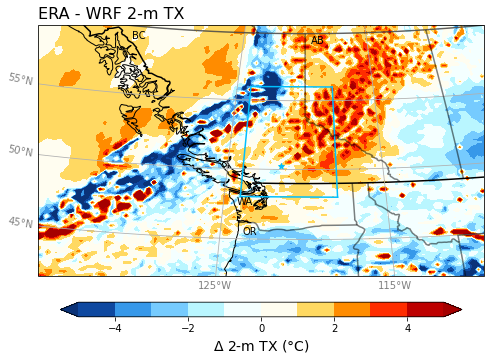

In [87]:
#### FIGURE 1 CODE #### 
fontsize = 16
fontsize_labels = 14

plt.suptitle("FIGURE 1")
fig = plt.figure(figsize=(8,6))

## WRF Max T with contours
ax2 = plt.subplot(1,1,1, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
ax2.set_title("ERA - WRF 2-m TX", fontsize= fontsize, loc = "left")
add_labels(ax2, 10)
ax2 = set_ax_overview(ax2,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

k = plt.contourf(june_max.longitude, june_max.latitude,(era_max.t2m - june_max.T2).values, 
                 cmap = cmap_wc,extend='both', levels = np.arange(-5,5.1,1), transform = ccrs.PlateCarree())

heatwave_box('deepskyblue')
plt.scatter(-121.5727, 50.2217, marker = "*", color = "deepskyblue", transform = ccrs.PlateCarree())
plt.colorbar(k, orientation = 'horizontal', extend = "both", shrink = 0.9,pad=0.08,aspect = 25).set_label(label = r"$\Delta$" + " 2-m TX (\N{DEGREE SIGN}C)",size = fontsize_labels)

#make colorbar
#cx = fig.add_axes([0.2, 0.04, 0.6,0.03]) 

plt.savefig('Suppfig1.png',facecolor='white')


## Cloud and radiation: figure and data (Supplementary Fig. 2)

In [5]:
#Find the climatological average radiation for june period
dsrs_clim = dsrs_pnw_ts.sel(valid_time = slice("1980", "2020")).groupby("valid_time.dayofyear").mean()

dsrs_clim_june = dsrs_clim.sel(dayofyear = slice(177, 182))#.groupby("dayofyear").mean() #1980-2020 climatologies over the "heatwave period"
dsrs_clim_july = dsrs_clim.sel(dayofyear = slice(177+30, 182+30))#.groupby("dayofyear").mean()
dsrs_clim_aug = dsrs_clim.sel(dayofyear = slice(177+60, 182+60))#.groupby("dayofyear").mean()

june_clim_mean = dsrs_clim_june.mean().values #mean climatological temperature over the heatwave period

#find the mean over the heatwave period
tcc_2021 = tcc_pnw_ts.sel(valid_time = slice("2021-06-26", "2021-06-30")).mean()
dsrs_2021 = dsrs_pnw_ts.sel(valid_time = slice("2021-06-26", "2021-06-30")).mean()

june2021_diff = (dsrs_2021 - dsrs_clim_june).mean().values #difference between the heatwave period and the climatology
print(june_clim_mean, june2021_diff)

#repeat for july
july_clim_mean = dsrs_clim_july.mean().values
rad30_diff = (june_clim_mean - july_clim_mean)
print(july_clim_mean, rad30_diff)

#repeat for august
aug_clim_mean = dsrs_clim_aug.mean().values
rad60_diff = (june_clim_mean - aug_clim_mean)
print(aug_clim_mean, rad60_diff)

261.0505861669824 81.76822672196853
265.95797592434224 -4.9073897573598515
198.88699281089364 62.16359335608874


### Supplementary Figure 2

In [7]:
# Calculate anomalous cloud cover
tcc_mapHW = tcc_data.sel(latitude = slice(65,40), longitude = slice(-150+360,-100+360), 
                       valid_time = slice("2021-06-26", "2021-06-30")).mean(dim = "valid_time").tcc

tcc_map_clim = tcc_data.sel(latitude = slice(65,40), longitude = slice(-150+360,-100+360), 
                       valid_time = slice("1980", "2020")).groupby("valid_time.dayofyear").mean().tcc
tcc_june_clim = tcc_map_clim.sel(dayofyear = slice(177,182)).mean(dim = "dayofyear")
tcc_july_clim = tcc_map_clim.sel(dayofyear = slice(177+30,182+30)).mean(dim = "dayofyear")
tcc_aug_clim = tcc_map_clim.sel(dayofyear = slice(177+60,182+60)).mean(dim = "dayofyear")

#calculate the climatological difference between June and each simulation
tcc_map_anomHW = tcc_mapHW - tcc_june_clim
tcc_map_anom30 = tcc_june_clim - tcc_july_clim
tcc_map_anom60 = tcc_june_clim - tcc_aug_clim


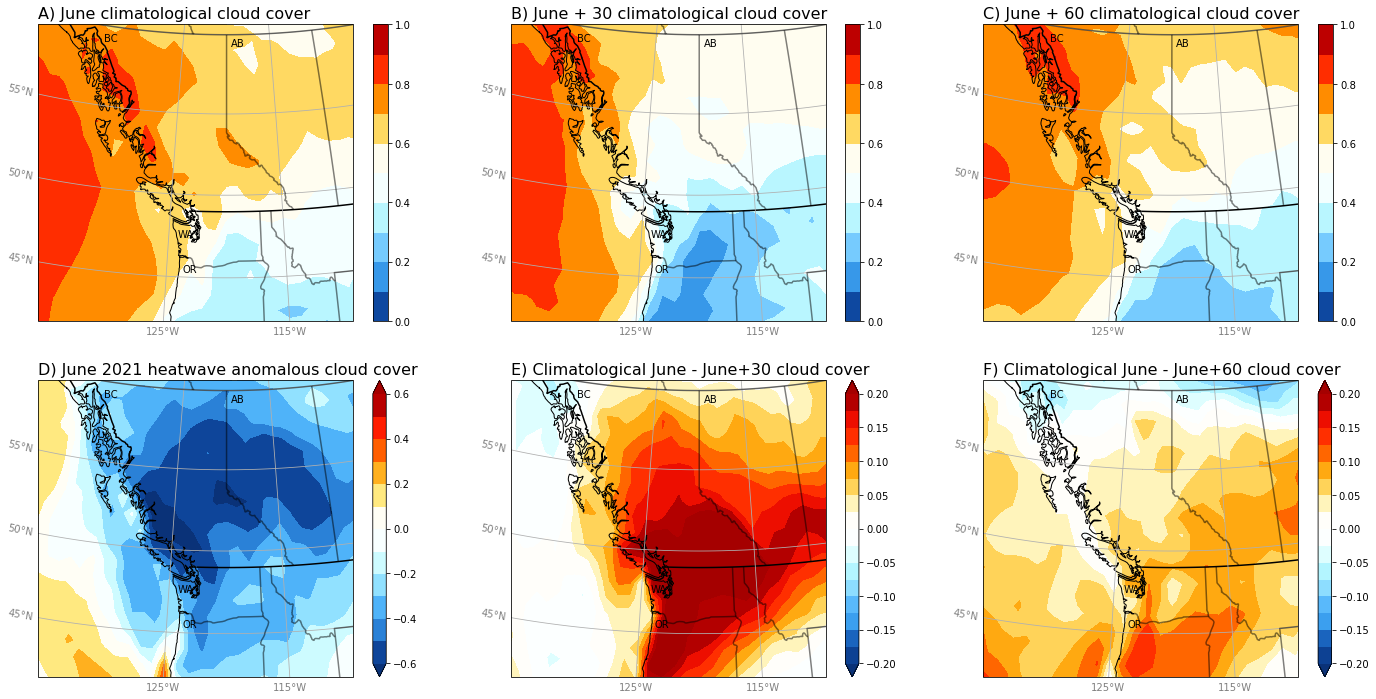

In [67]:
# Plot cloud cover anomalies and climatological differences
fig = plt.figure(figsize=(24,12))

ax1 = plt.subplot(2,3,1, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("A) June climatological cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((tcc_june_clim).longitude, (tcc_june_clim).latitude, (tcc_june_clim).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='neither', levels = np.arange(0,1.01,0.1), add_colorbar = True)
plt.colorbar()

ax1 = plt.subplot(2,3,2, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("B) June + 30 climatological cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((tcc_july_clim).longitude, (tcc_july_clim).latitude, (tcc_july_clim).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='neither', levels = np.arange(0,1.01,0.1), add_colorbar = True)
plt.colorbar()

ax1 = plt.subplot(2,3,3, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("C) June + 60 climatological cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((tcc_aug_clim).longitude, (tcc_aug_clim).latitude, (tcc_aug_clim).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='neither', levels = np.arange(0,1.01,0.1), add_colorbar = True)
plt.colorbar()


ax1 = plt.subplot(2,3,4, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("D) June 2021 heatwave anomalous cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((tcc_map_anomHW).longitude, (tcc_map_anomHW).latitude, (tcc_map_anomHW).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='both', levels = np.arange(-0.6,0.61,0.1), add_colorbar = True)
plt.colorbar()


ax1 = plt.subplot(2,3,5, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("E) Climatological June - June+30 cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((tcc_map_anom30).longitude, (tcc_map_anom30).latitude, (tcc_map_anom30).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='both', levels = np.arange(-0.2,0.21,0.025), add_colorbar = True)
plt.colorbar()

ax1 = plt.subplot(2,3,6, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("F) Climatological June - June+60 cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((tcc_map_anom60).longitude, (tcc_map_anom60).latitude, (tcc_map_anom60).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='both', levels = np.arange(-0.2,0.21,0.025), add_colorbar = True)
plt.colorbar()
plt.savefig('Suppfig2.png',facecolor='white')
plt.show()


## -30day figure and data (Supplementary Fig. 3)

In [10]:
#Max and Mean Temperatures
may_meanT = mean_temperature(may_2d)
may_maxT = max_temperature(may_2d)
print(f"Maximum Temperature: {round(float(may_maxT.values),4)}, Mean Temperature: {round(float(may_meanT.values),4)}")

#Mean Radiation
may_meanrad = mean_radiation(may_2d)
print(f"Mean Radiation: {round(float(may_meanrad.values),4)}")

Maximum Temperature: 39.4624, Mean Temperature: 26.9103
Mean Radiation: 349.2964


In [11]:
##Main Runs
rlat1 = 40
rlat2 = 60
rlon1=-130
rlon2=-110

records_broken = (era_test_hw - era_daily_max_PNW)

mask_file = xr.open_dataset(filepath+'better_mask_regrid.nc')
mask = (mask_file/mask_file).sel(latitude = slice(40,65), longitude = slice(-140, -100)).mean(dim = "time").t2m


#find maximum temperature at each gridpoint
june_max = june2d_bc.max(dim = 'XTIME').T2
may_max = may2d_bc.max(dim = 'XTIME').T2

#(any record exceedance)
may_area0, may_mask2 = records_area(records_broken, june_max, may_max, 0,filepath+'area_gridera.nc', 
                                      mask,rlat1,rlat2,rlon1,rlon2)
june_area0, june_mask2 = records_area(records_broken, june_max, june_max, 0,filepath+'area_gridera.nc', 
                                      mask,rlat1,rlat2,rlon1,rlon2)

may_area3, may_mask2 = records_area(records_broken, june_max, may_max, 3,filepath+'area_gridera.nc', 
                                      mask,rlat1,rlat2,rlon1,rlon2)
june_area3, june_mask2 = records_area(records_broken, june_max, june_max, 3,filepath+'area_gridera.nc', 
                                      mask,rlat1,rlat2,rlon1,rlon2)


print(f'TOTAL RECORD EXCEEDANCE: Control: {round(float(june_area0.values),0)}, -30day: {round(float(may_area0.values),0)}')
print(f'-30 decrease: {round(float((june_area0-may_area0)/june_area0),2)}')

#3 degree record exceedance

print(f'Substantial RECORD EXCEEDANCE: Control: {round(float(june_area3.values),0)}, -30day: {round(float(may_area3.values),0)}')
print(f'-30 decrease: {round(float((june_area3-may_area3)/june_area3),2)}')


TOTAL RECORD EXCEEDANCE: Control: 1401198.0, -30day: 1284370.0
-30 decrease: 0.08
TOTAL RECORD EXCEEDANCE: Control: 504969.0, -30day: 397675.0
-30 decrease: 0.21


### Supplementary Fig. S3

In [51]:
##find records in ERA5 data
era_dailymax = era_reg.resample(time = "1D").max()
#find daily maximum and find the 2021 event in era5
era_daily_max_PNW = era_dailymax.sel(latitude = slice(40,65), longitude = slice(-140,-100), 
                       time = slice("1940-01-01T00:00:00.000000000", "2021-06-01T00:00:00.000000000")).t2m.max(dim = "time")
era_test_hw = era_dailymax.sel(latitude = slice(40,65), longitude = slice(-140, -100), 
                       time = slice("2021-06-26T00:00:00.000000000", "2021-06-30T00:00:00.000000000")).t2m.max(dim = "time")



In [43]:
#find maxes in wrf data
june_max_rec = june2d_bc.sel(XTIME = june2d_bc.XTIME[57:153], latitude = slice(65,40), longitude = slice(-140,-100)).T2.max(dim = "XTIME")
may_max_rec = may2d_bc.sel(XTIME = may2d_bc.XTIME[57:153], latitude = slice(65,40), longitude = slice(-140,-100)).T2.max(dim = "XTIME")

#find records broken during the 2021 event
records_broken = (era_test_hw - era_daily_max_PNW)

/arc/project/st-rwhite01-1/jupyter/RHW_py3_env/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/arc/project/st-rwhite01-1/jupyter/RHW_py3_env/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


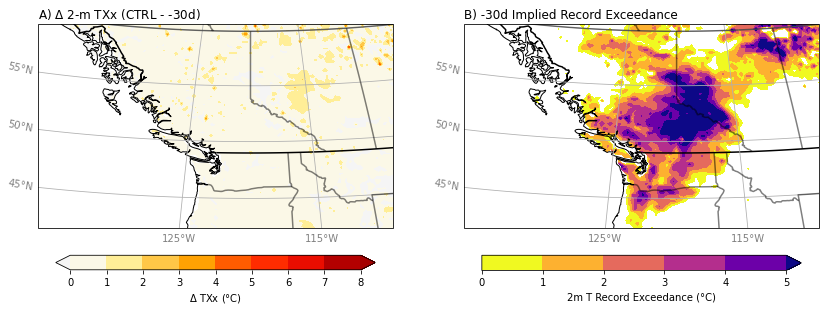

In [76]:
# Create plot 
june_max = june_2d.sel(XTIME = june_2d.XTIME[57:153], latitude = slice(65,40), longitude = slice(-140,-100)).T2.max(dim = "XTIME")
may_max = may_2d.sel(XTIME = may_2d.XTIME[57:153], latitude = slice(65,40), longitude = slice(-140,-100)).T2.max(dim = "XTIME")
mask_file = xr.open_dataset(filepath+'better_mask_regrid.nc')
mask = (mask_file/mask_file).sel(latitude = slice(40,65), longitude = slice(-140, -100)).mean(dim = "time").t2m

diff = june_max - may_max
fig = plt.figure(figsize = (14,5))
ax1 = plt.subplot(1,2,1, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
plt.title(r"A) $\Delta$ 2-m TXx (CTRL - -30d)",loc='left')
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)
diff_plot = plt.contourf(diff.longitude, diff.latitude, (diff*mask).values,transform=ccrs.PlateCarree(),
                                    cmap = cmap_reds,levels = np.linspace(0,8.0,9),extend='both')


#Record Exceedance
ax2 = plt.subplot(1,2,2, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
plt.title("B) -30d Implied Record Exceedance",loc='left')
ax2 = set_ax_overview(ax2,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)
records = records_broken - diff
records_plot = plt.contourf(records.longitude, records.latitude, (records*mask).values,transform=ccrs.PlateCarree(),
                                    cmap = cmap_pl,levels = levels,extend='max',norm=norm)

fig.colorbar(diff_plot,extend = "both", shrink = 0.9, pad = 0.1,
             ax = ax1, orientation = "horizontal").set_label(label = r"$\Delta$ TXx" + " (\N{DEGREE SIGN}C)", fontsize = 10)

fig.colorbar(records_plot,extend = "both", shrink = 0.9, pad = 0.1,
             ax = ax2, orientation = "horizontal").set_label(label = "2m T Record Exceedance (\N{DEGREE SIGN}C)", fontsize = 10)

plt.savefig('Suppfig3.png',facecolor='white')


## Plot cloud differences between experiments


In [27]:
# Read in high mid and low cloud data
indices = np.arange(57,153+1)

with xr.open_dataset(filepath + "june_cld_high_ncar_slope_d02_reproj_regrid.nc") as june_cldh:
    #grab june data for maps and timeseries
    june_highcld = june_cldh.sel(lat = slice(40,65), lon = slice(-140, -100), Time = june_cldh.Time[indices])
with xr.open_dataset(filepath + "june_cld_mid_ncar_slope_d02_reproj_regrid.nc") as june_cldm:
    #grab june data for maps and timeseries
    june_midcld = june_cldm.sel(lat = slice(40,65), lon = slice(-140, -100), Time = june_cldm.Time[indices])
with xr.open_dataset(filepath + "june_cld_low_ncar_slope_d02_reproj_regrid.nc") as june_cldl:
    #grab june data for maps and timeseries
    june_lowcld = june_cldl.sel(lat = slice(40,65), lon = slice(-140, -100), Time = june_cldl.Time[indices])
    
june_totcld = (june_highcld + june_midcld + june_lowcld).mean(dim='Time')
    
with xr.open_dataset(filepath + "july_cld_high_ncar_slope_d02_reproj_regrid.nc") as july_cldh:
    july_highcld = july_cldh.sel(lat = slice(40,65), lon = slice(-140, -100), Time = july_cldh.Time[indices])

with xr.open_dataset(filepath + "july_cld_mid_ncar_slope_d02_reproj_regrid.nc") as july_cldm:
    july_midcld = july_cldm.sel(lat = slice(40,65), lon = slice(-140, -100), Time = july_cldm.Time[indices])

with xr.open_dataset(filepath + "july_cld_low_ncar_slope_d02_reproj_regrid.nc") as july_cldl:
    july_lowcld = july_cldl.sel(lat = slice(40,65), lon = slice(-140, -100), Time = july_cldl.Time[indices])
    
july_totcld = (july_highcld + july_midcld + july_lowcld).mean(dim='Time')

    
with xr.open_dataset(filepath + "aug_cld_high_ncar_slope_d02_reproj_regrid.nc") as aug_cldh:
    aug_highcld = aug_cldh.sel(lat = slice(40,65), lon = slice(-140, -100), Time = aug_cldh.Time[indices])

with xr.open_dataset(filepath + "aug_cld_mid_ncar_slope_d02_reproj_regrid.nc") as aug_cldm:
    aug_midcld = aug_cldm.sel(lat = slice(40,65), lon = slice(-140, -100), Time = aug_cldm.Time[indices])

with xr.open_dataset(filepath + "aug_cld_low_ncar_slope_d02_reproj_regrid.nc") as aug_cldl:
    aug_lowcld = aug_cldl.sel(lat = slice(40,65), lon = slice(-140, -100), Time = aug_cldl.Time[indices])
    
aug_totcld = (aug_highcld + aug_midcld + aug_lowcld).mean(dim='Time')


/arc/project/st-rwhite01-1/jupyter/RHW_py3_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


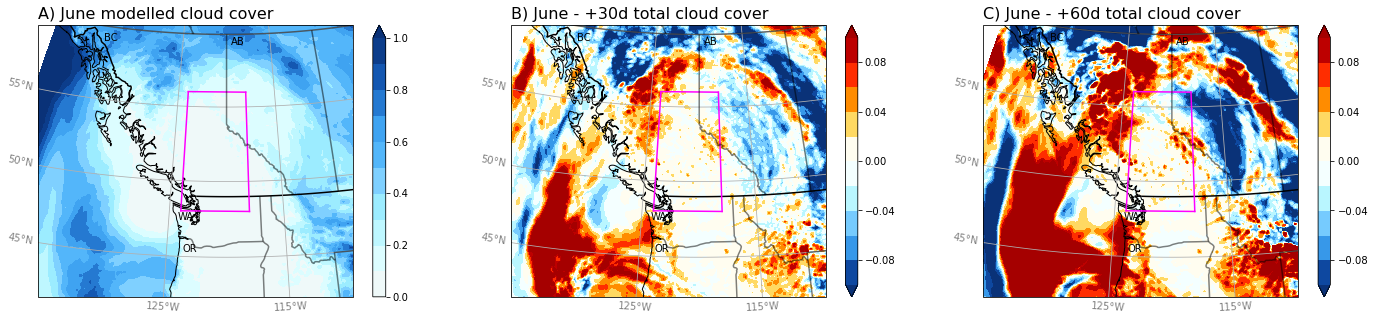

In [50]:
# Plot differences between experiments
# Plot cloud cover anomalies and climaological differences
fig = plt.figure(figsize=(24,5))

ax1 = plt.subplot(1,3,1, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("A) June modelled cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((june_totcld).lon, (june_totcld).lat, (june_totcld.cld).values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_blues,extend='max', levels = np.arange(0,1.01,0.1), add_colorbar = True)
heatwave_box('magenta')

plt.colorbar()

ax1 = plt.subplot(1,3,2, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("B) June - +30d total cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((june_totcld).lon, (june_totcld).lat, (june_totcld - july_totcld).cld.values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='both', levels = np.arange(-0.1,0.101,0.02), add_colorbar = True)
heatwave_box('magenta')

plt.colorbar()

ax1 = plt.subplot(1,3,3, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))
add_labels(ax1, 10)
ax1.set_title("C) June - +60d total cloud cover", fontsize=fontsize, loc = "left")
ax1 = set_ax_overview(ax1,central_lon,central_lat,lon_extent,lat_extent,longrids,latgrids,province=True)

j = plt.contourf((june_totcld).lon, (june_totcld).lat, (june_totcld - aug_totcld).cld.values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_wc,extend='both', levels = np.arange(-0.1,0.101,0.02), add_colorbar = True)
heatwave_box('magenta')

plt.colorbar()

#plt.savefig('Suppfig3.png',facecolor='white')
plt.show()
